# Python Data Visualization
**Please use newest python (>=3.6), following the fashion when you don't have to maintain old codes!**

## 0. Content
1. Introduction of basic conceptes
2. Case study by toy data
    - Variable distribution
    - Variable relationship
        - Compare based on x, y axis
            - Categorical-Continuous Relationship
            - Categorical-Categorical Relationship
            - Continuous-Continuous Relationship
        - Compare other than x, y axis
            - Visual code
            - Small multiple
3. Glance of more advanced tools in the python ecosystem 

## 1. Introduction

### 1.1 Package used

In [133]:
import pandas as pd  # process tabular data.
import numpy as np  # process Nd array data, will not use too much today.
import matplotlib  # basic python ploting package.
import matplotlib.pyplot as plt 
import seaborn as sns  # scientific python ploting package, based on matplotlib, more convenient.

import platform
print('python version:', platform.python_version())
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)  # only seaborn version 0.9.0 have scatterplot, which we will use today
# if not, run "conda install seaborn=0.9.0"

# some config at begining
sns.set_context("paper", font_scale=0.8)
matplotlib.rc('figure', figsize=(3, 2), dpi=200)  # make figures more clear

python version: 3.6.5
pandas version: 0.23.0
numpy version: 1.14.3
matplotlib version: 2.2.2
seaborn version: 0.9.0


#### For config
- Make some general config about plots
- This is very practical, see more details at 
    - [Seaborn part](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - [Matplotlib part](https://matplotlib.org/users/customizing.html)

### 1.2 Example Data
- Metadata of 25,000 single cell methylation sequencing
- Collected from 10 experiment, 21 replicate
- Some toy analysis results attached

In [123]:
data = pd.read_table('single_cell_data.tsv.gz', index_col=0)
row, col = data.shape
print(f'{row} cells with {col} columns of features')
data.head()

24896 cells with 18 columns of features


,total_reads,mapped_reads,filtered_reads,genome_coverage,mcg,mch,experiment,replicate,plate_col,plate_row,tSNE_1,tSNE_2,gene1,gene2,gene3,gene4,gene5,cluster
cell_id,,,,,,,,,,,,,,,,,,
cell_0,4061840,2765172,1932779,7.99,0.766,0.021,Exp06,Rep1,col_10,row_A,7.651,12.504,-0.803,-0.174,-0.172,0.404,-0.194,Cluster07
cell_1,3240886,2226396,1549132,6.46,0.760,0.020,Exp06,Rep1,col_10,row_A,0.222,6.903,-0.684,-0.276,-0.190,0.540,-0.331,Cluster07
cell_2,5217724,3577060,2339654,9.60,0.778,0.020,Exp06,Rep1,col_11,row_A,-11.503,-12.931,-0.501,-0.816,0.221,0.395,-0.202,Cluster03
cell_3,5552334,3742394,2353156,9.58,0.764,0.019,Exp06,Rep1,col_11,row_B,-6.435,-25.998,-0.602,-0.495,0.114,0.446,-0.257,Cluster02
cell_4,2123406,1421453,958205,4.08,0.778,0.021,Exp06,Rep1,col_04,row_D,-0.706,15.875,-0.420,-0.478,-0.178,0.567,-0.312,Cluster06


### 1.3 Tidy data vs Non-tidy data
Question: Let's count how many cells are there in each well of 96-well plate, based on column plate_col and plate_row

#### 1.3.1 [Tidy data](https://www.google.com/search?newwindow=1&rlz=1C5CHFA_enUS764US764&biw=1920&bih=960&tbm=isch&sa=1&ei=Z2GXW9AJh__TAqedpPAH&q=tidy+data&oq=tidy+data&gs_l=img.3...0.0..28091...0.0..0.0.0.......1......gws-wiz-img.vCtdDALQVJ0)
- Row is observation, col is variable

In [124]:
# some pandas magic
tidy_count_table = data.groupby(['plate_col', 'plate_row'])\
                       .apply(lambda i: i.shape[0])\
                       .reset_index()\
                       .rename(columns={0: 'cell_count'})
# done
row, col = tidy_count_table.shape
print(f'Tidy data have {row} rows and {col} columns')
tidy_count_table.head(12)

Tidy data have 96 rows and 3 columns


,plate_col,plate_row,cell_count
0,col_01,row_A,280
1,col_01,row_B,287
2,col_01,row_C,247
3,col_01,row_D,242
4,col_01,row_E,252
5,col_01,row_F,286
6,col_01,row_G,271
7,col_01,row_H,266
8,col_02,row_A,278
9,col_02,row_B,287


#### 1.3.2 Non-tidy data
- This is what you would expect for a 96-well count table, but not easy for programming.

In [237]:
non_tidy_count_table = tidy_count_table.set_index(['plate_col', 'plate_row']).unstack().T
non_tidy_count_table.index = non_tidy_count_table.index.droplevel(0)
non_tidy_count_table

plate_col,col_01,col_02,col_03,col_04,col_05,col_06,col_07,col_08,col_09,col_10,col_11,col_12
plate_row,,,,,,,,,,,,
row_A,280,278,294,281,259,272,290,275,279,282,228,176
row_B,287,287,287,280,286,278,280,277,272,283,272,195
row_C,247,266,281,274,282,281,278,271,285,280,288,180
row_D,242,291,289,272,279,279,270,283,278,276,225,168
row_E,252,274,286,242,280,276,261,259,269,273,265,184
row_F,286,266,278,272,274,263,269,263,262,268,259,169
row_G,271,266,249,264,250,260,254,235,251,265,252,158
row_H,266,255,238,249,253,256,247,210,240,243,223,148


#### 1.3.3 Why is this important?
- **Because it makes programming discription much easier. Think about > 3 variables when making plots**
- [Theoretical support](http://vita.had.co.nz/papers/tidy-data.pdf) which you won't read

#### 1.3.4 \[Not For Today\] How to play with this transformation magic?
- Use pandas, which is not discussed today, but you can find more information here:
    - [Reshape data, from non-tidy to tidy](http://pandas.pydata.org/pandas-docs/stable/reshaping.html)
    - [Concatenate, merge join data](http://pandas.pydata.org/pandas-docs/stable/merging.html)
    - [Group by data to apply function](http://pandas.pydata.org/pandas-docs/stable/groupby.html)
- All this part is super important and useful.
- For book about pandas, recommand [this](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=sr_1_4?ie=UTF8&qid=1536648478&sr=8-4&keywords=python+data+science), also have Chinese version.

### 1.4 Types of Variable
- Continuous Variable
- Categorical Variable

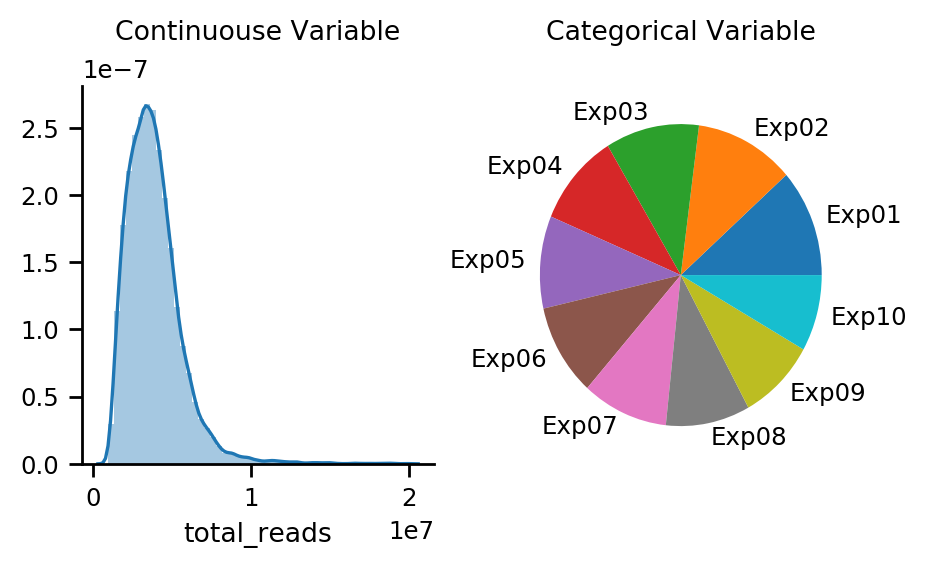

In [126]:
# a typical example of the combination of seaborn and matplotlib

# initialize
fig, ax = plt.subplots(ncols=2)  # plot 2 plots together
ax1, ax2 = ax  # take out 2 axes

# make plots
# pass ax1 to seaborn
sns.distplot(data.total_reads, ax=ax1)
# or use ax2's own function
exp_count = data.experiment.value_counts()
ax2.pie(x=exp_count, labels=exp_count.index)

# Config
fig.set_size_inches(5, 2.5)  # set size
ax1.set_title('Continuouse Variable\n')
ax2.set_title('Categorical Variable\n')
sns.despine(fig=fig)

### 1.5 Matplotlib Basics
#### 1.5.1 Figure and axes (IMPORTANT)
- Easy answer: Figure is main container of axes, axes are like panels of figure. Both are main entrance of custom configs.
- Details: [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure), [Axes](https://matplotlib.org/api/axes_api.html) class and abstract base class [Artist](https://matplotlib.org/api/artist_api.html)

<img src="img/figure_axes_axis_labeled.png">

#### \[Not For Today\] 1.5.2 Subplot and GridSpec
- `plt.subplots()`, an easy way to organize multiple axes
- GridSpec and SubplotSpec, a more complex framework to organize axes
- Here is the full tutorial: [Customizing Figure Layouts Using GridSpec and Other Functions](https://matplotlib.org/tutorials/intermediate/gridspec.html?highlight=gridspec)

#### 1.5.3 Find correct attributes and documentation
- Step 1. Use dir() to check avaliable attr and method
    - try this: 
    ```python 
    dir(ax1)```

- Step 2. Use doc string of each method, especially convinent in jupyter notebook
    - try this:
    ```python
ax1.pie(# press tab here)
    ```

- Step 3. Search example on google
- Step 4. Use full doc:
[Axes class](https://matplotlib.org/api/axes_api.html)

## 2. Case Study


### 2.1 Variable distribution

### 2.1.1 Single case
Shown in [1.4](#1.4-Types-of-Variable)
- Well, seabor author will [never support pie chart](https://github.com/mwaskom/seaborn/issues/766), but matplotlib does 😂
- For distribution plot, you have more choices [here](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)

### 2.1.2 Multiple case
#### 2.1.2.1 2D

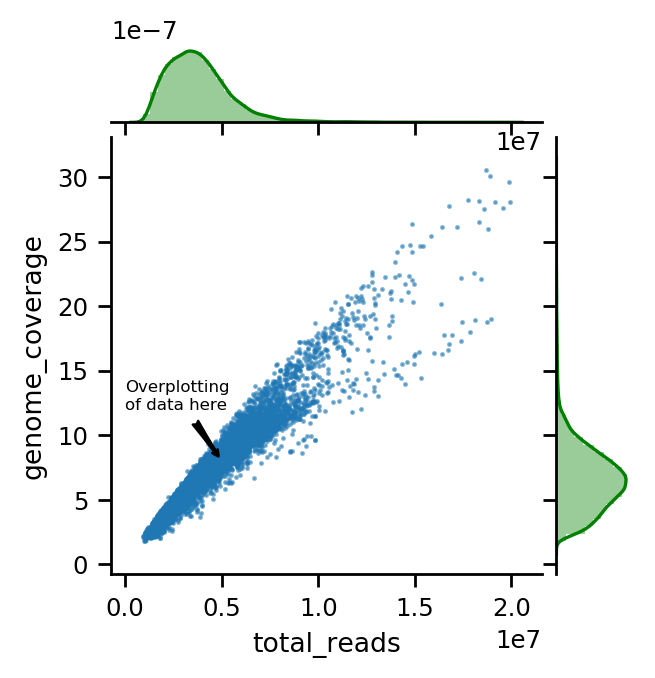

In [127]:
g = sns.jointplot(x='total_reads', y='genome_coverage', data=data,
                  s=1, alpha=0.5, marginal_kws={'kde': True, 'color': 'green'})
# Question: what is g?

# example of customizing axes, which is not in the seaborn doc
g.ax_joint.annotate('Overplotting\nof data here', xy=(5e6, 8), xytext=(0, 12), fontsize=6,
                    arrowprops=dict(facecolor='black', arrowstyle='fancy'))  # this function is matplotlib part, not for today, but try search matplotlib annotate in google
# example of customizing fig
g.fig.set_size_inches(3, 3)

##### JointGrid class of seaborn (IMPORTANT)
- Full doc [here](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)
- `sns.jointplot()` is a Figuer level function, which return JointGrid
- JointGrid contains instance of matplotlib Figure, as well as the 3 Axes in this Figure.
- JointGrid also contains some function to plot on these matplotlib instances
- **Once you get the matplotlib figure or axes, you can customize it anyway you want.**

In [128]:
print(type(g))
# try dir(g), and then you will understand next 2 lines
print(type(g.fig))
print(type(g.ax_joint), type(g.ax_marg_x), type(g.ax_marg_y))

<class 'seaborn.axisgrid.JointGrid'>
<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.axes._subplots.AxesSubplot'>


##### Figure level vs Axes level functions of seaborn
- After this example, you should understand [this](https://seaborn.pydata.org/introduction.html#intro-func-types)
- Then, you should be able to understand FacetGrid, PairGrid as well.
- That is all 3 multi-plot grids in seaborn, listed [here](https://seaborn.pydata.org/api.html#multi-plot-grids)

#### 2.1.2.2 N-D
- again, you can customize more by getting the fig and ax
- try `g.fig` and `g.axes`
- but if too much custom needed, you'd better use [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) directly
- After this, 

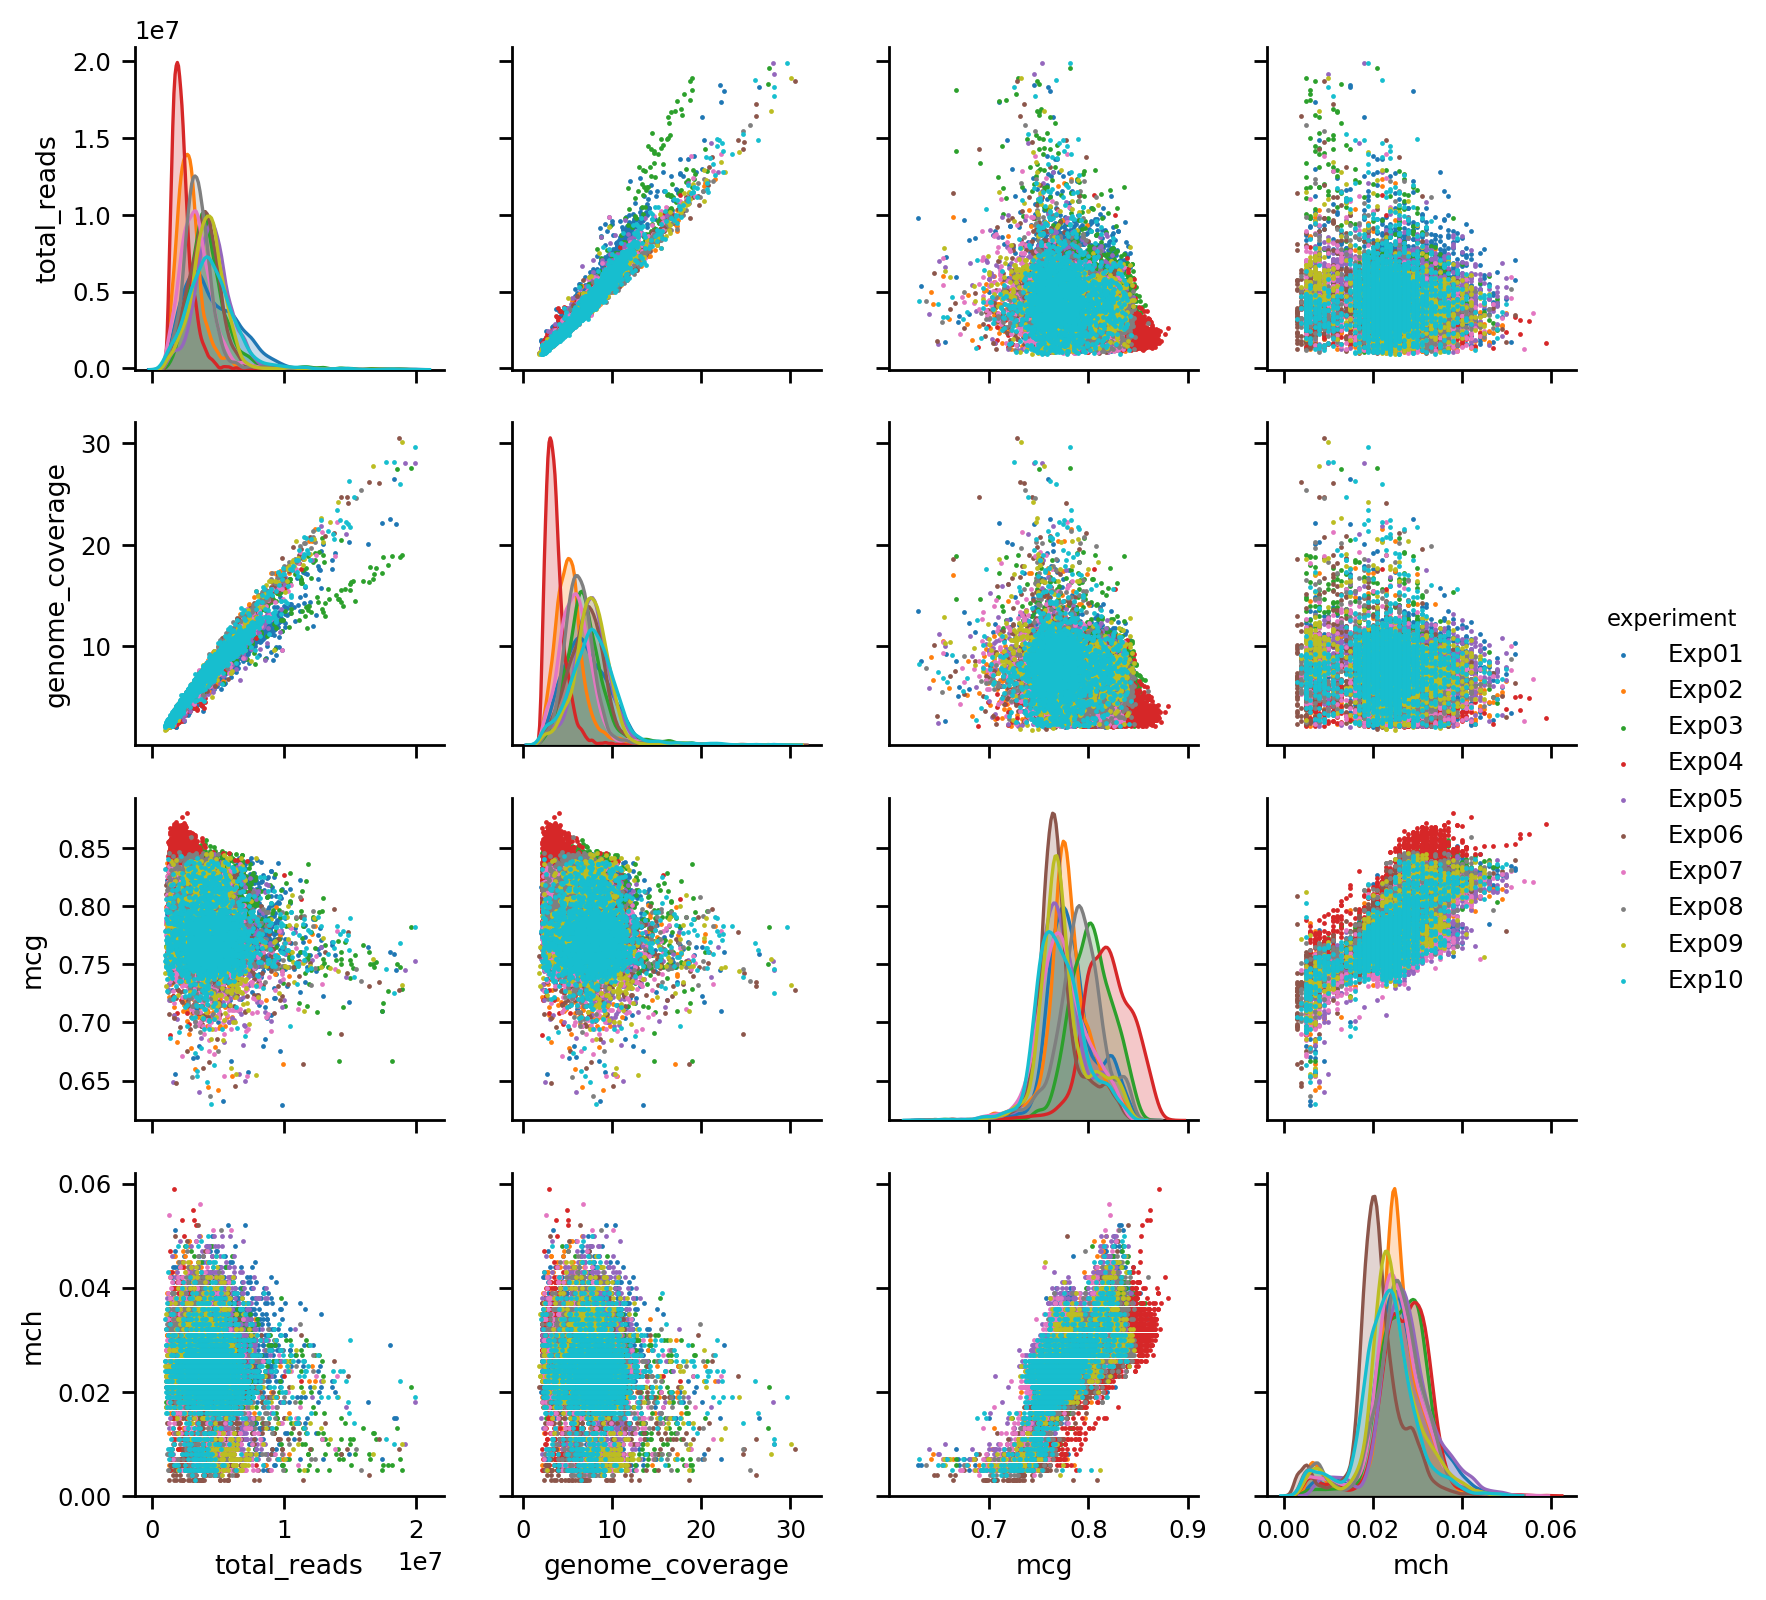

In [129]:
g = sns.pairplot(data=data[['total_reads', 'genome_coverage', 'mcg', 'mch', 'experiment']],  # take variables we are interested
                 hue='experiment', hue_order=sorted(data['experiment'].unique()),  # set hue
                 height=2, plot_kws=dict(s=3, linewidth=0))  # plot adjustment

### 2.2 Variable relationship
#### 2.2.1 Compare based on x, y axis
##### 2.2.1.1 Categorical-Continuous Relationship
See related seaborn tutorial [here](https://seaborn.pydata.org/tutorial/categorical.html)

**Version 1**, What do you get?

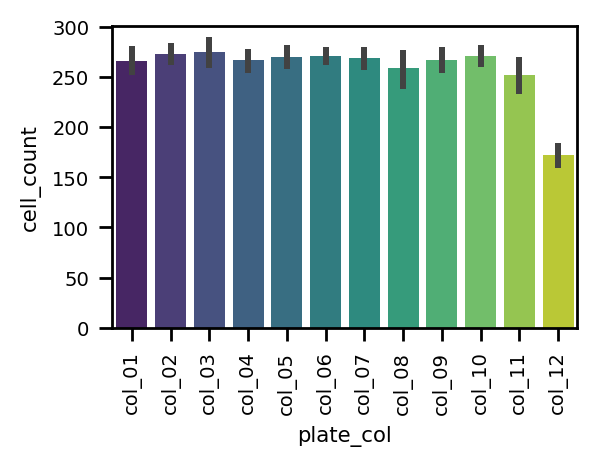

In [284]:
# let's take a look at the cell count table
ax_v1 = sns.barplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis')
ax_v1.tick_params(axis='x', labelrotation=90)

**Version 2**, What do you get?

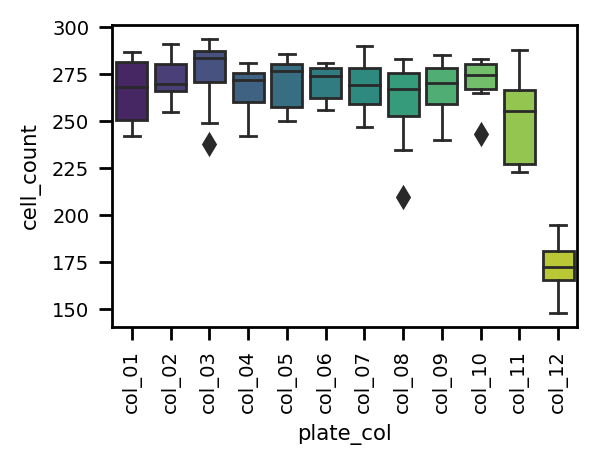

In [283]:
ax_v2 = sns.boxplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=1)
ax_v2.tick_params(axis='x', labelrotation=90)

**Version 3**, What do you get?

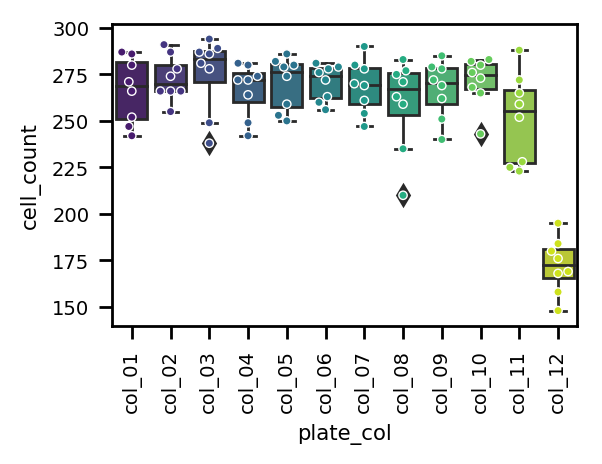

In [282]:
ax_v3 = sns.boxplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=1, )
ax_v3 = sns.swarmplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.5, s=3, edgecolor='white')
ax_v3.tick_params(axis='x', labelrotation=90)

**Version 4**, What do you get?

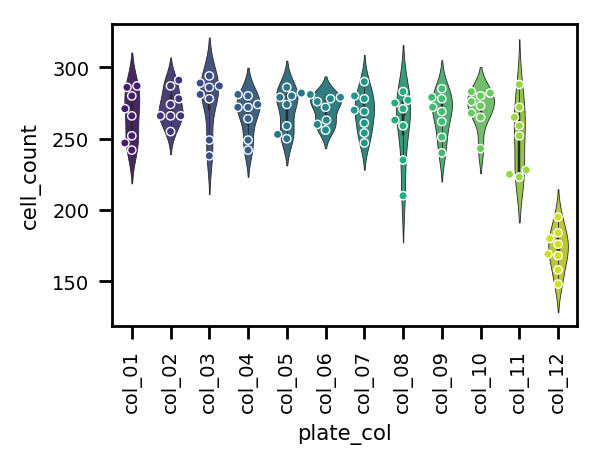

In [281]:
ax_v4 = sns.violinplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.3)
ax_v4 = sns.swarmplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.5, s=3, edgecolor='white')
ax_v4.tick_params(axis='x', labelrotation=90)

**Summary**
- Multiple ways exist for categorical data vs continous data
- Select one that can most **faithfully** discribe the real distribution
- Take care about outliers
- Not every distribution is normal distribution
- We saw boxplot all the time, but boxplot may hide some inner wierd (interesting or wrong) distribution
- Sometimes, single points are more important than overall distribution

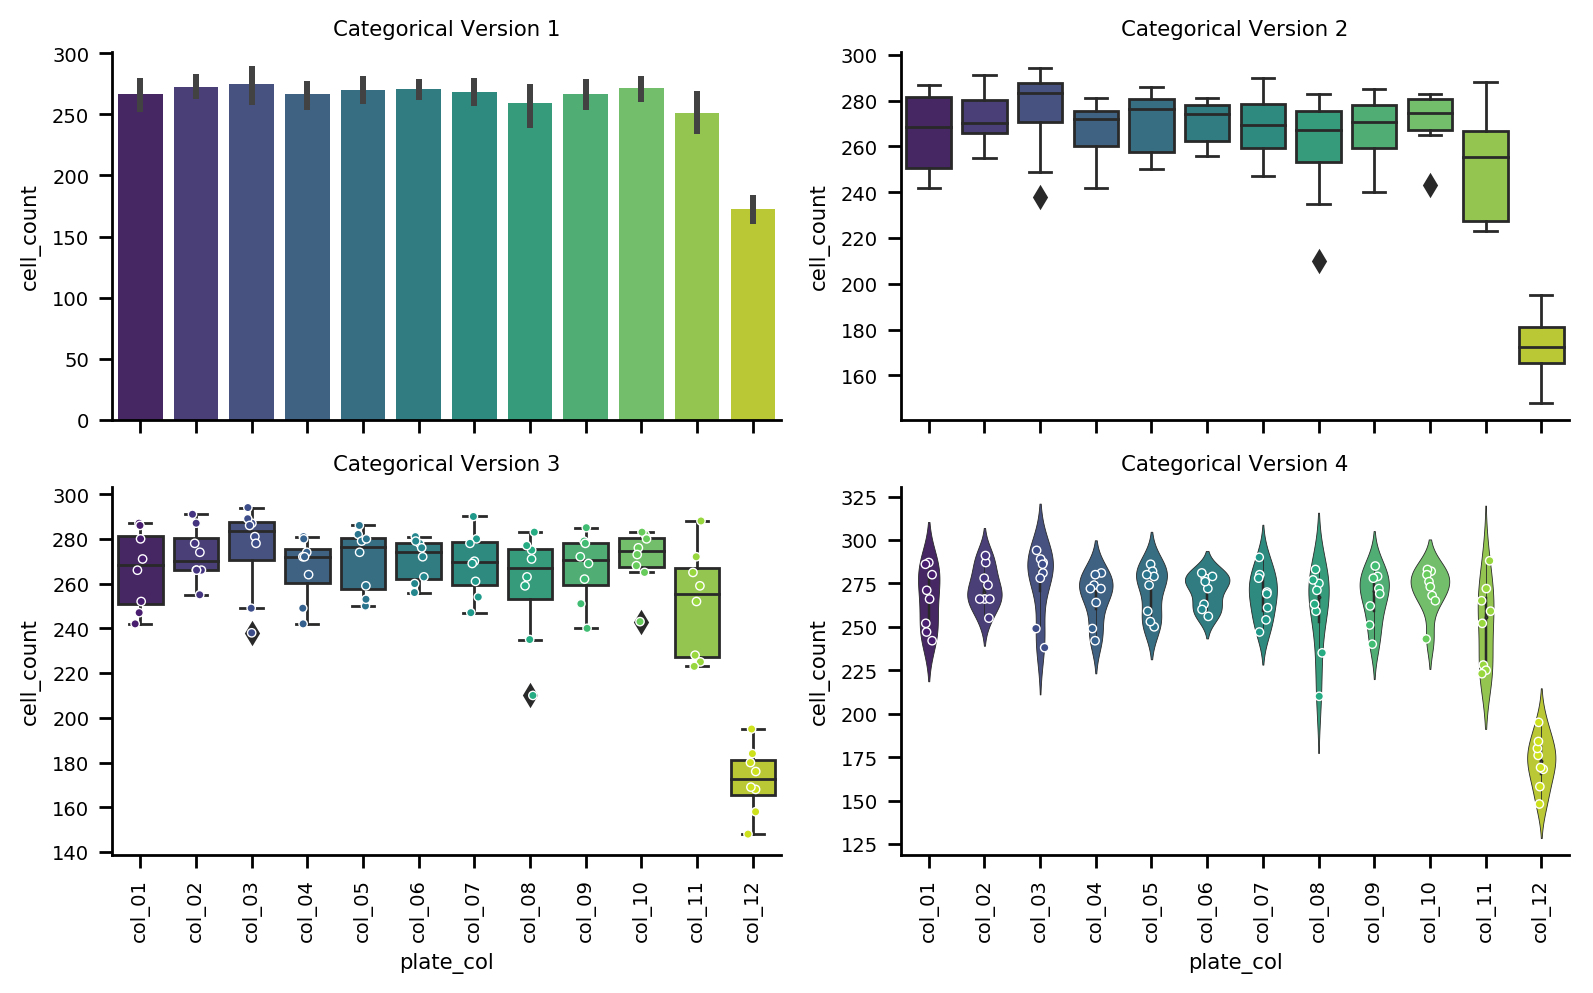

In [280]:
# how to plot together
# 1. get container
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=False)

# 2. plot each
ax = axes[0, 0]
ax = sns.barplot(x='plate_col', y='cell_count', data=tidy_count_table,
                    palette='viridis', ax=ax)
ax = axes[0, 1]
ax = sns.boxplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=1, ax=ax)
ax = axes[1, 0]
ax = sns.boxplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=1, ax=ax)
ax = sns.stripplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.5, s=3, edgecolor='white', ax=ax)
ax = axes[1, 1]
ax = sns.violinplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.3, ax=ax)
ax = sns.stripplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.5, s=3, edgecolor='white', ax=ax)

# 3.config
# for each ax
for i, ax in enumerate(np.ravel(axes)):
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(f'Categorical Version {i+1}')
    if i < 2:
        ax.set_xlabel('')
# [(ax.tick_params(axis='x', labelrotation=90), ax.set_title(f'Categorical Version {i+1}'), (ax.set_xlabel('')) if i < 2 else None) for i, ax in enumerate(np.ravel(axes))]

# for fig
fig.set_size_inches(8, 5)
fig.tight_layout()
sns.despine(fig=fig)

##### 2.2.1.2 Categorical-Categorical Relationship

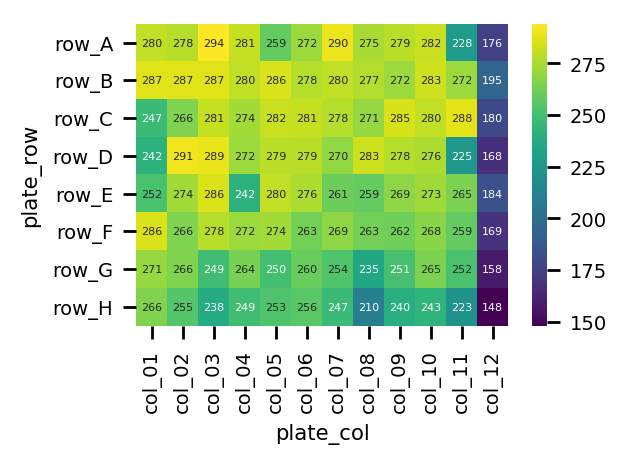

In [247]:
ax = sns.heatmap(non_tidy_count_table, cmap='viridis',
                 annot=True, fmt='2d', annot_kws=dict(fontsize=4))

##### 2.2.1.3 Continuous-Continuous Relationship
#### 2.2.2 Compare other than x, y axis
##### 2.2.2.1 Visual code
##### 2.2.2.2 Small multiple

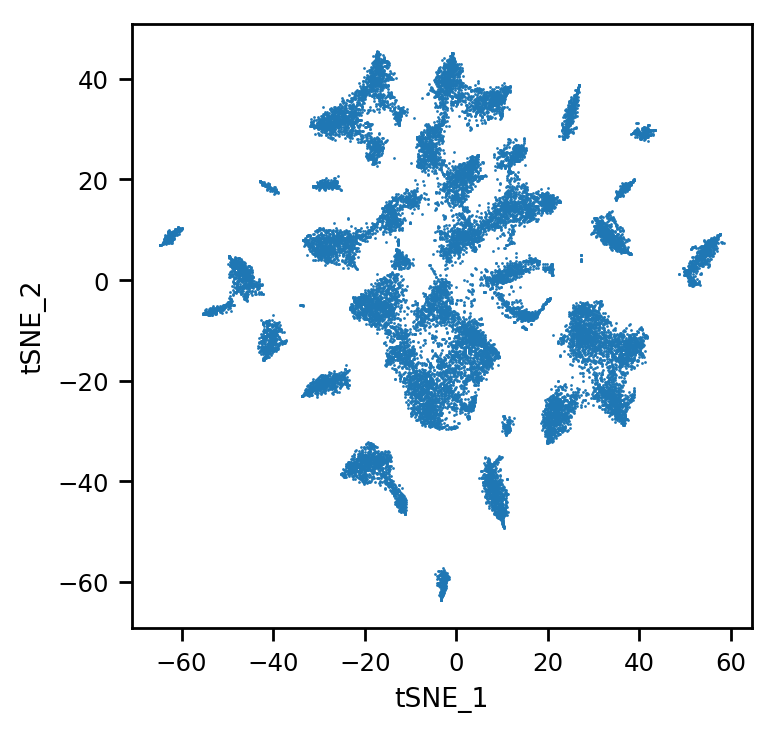

In [14]:
sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, linewidth=0, s=1)

## Take Home Message
- 